In [11]:
%pip install ai-traffic-light-simulator


[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np

NORTH_SOUTH_GREEN = 0
EAST_WEST_GREEN = 1

class Organism:
    def __init__(self, layers):
        self.layers = layers
        self.weights = []
        self.biases = []
        for i in range(1,len(layers)):
            self.weights.append(np.random.normal(loc=0.0, size=(layers[i-1], layers[i])))
            self.biases.append(np.random.normal(loc=0.0, size=layers[i]))
            
    def predict(self, inputs):
        assert(self.layers[0] == len(inputs))
        result = inputs
        for i in range(0, len(self.weights)):
            result = np.matmul(result, self.weights[i])
            result += self.biases[i]
            result = np.tanh(result)
            
        return result
    
    def do_ai(self, inputs):
        new_dir = EAST_WEST_GREEN if inputs[-1] == NORTH_SOUTH_GREEN else NORTH_SOUTH_GREEN
        new_time = self.predict(inputs)[0]
        MAX_TIME = 30
        MIN_TIME = 6

        new_time = (((new_time /2.0) + 0.5) * (MAX_TIME - MIN_TIME)) + MIN_TIME
        
        return new_dir, new_time

    def mutate(self, ):
        mutation_rate = 0.2
        mutation_weight = 0.2
        mutated = Organism(self.layers)
        
        mutated_weights = []
        for i in range(len(self.weights)):
            weight_shape = self.weights[i].shape
            mutated_weights.append(self.weights[i] + ((mutation_weight * np.random.normal(size=weight_shape)) * (np.random.uniform(size=weight_shape) > (1.0 - mutation_rate))))
        
        mutated_biases = []
        for i in range(len(self.biases)):
            bias_shape = self.biases[i].shape
            mutated_biases.append(self.biases[i] + ((mutation_weight * np.random.normal(size=bias_shape)) * (np.random.uniform(size=bias_shape) > (1.0 - mutation_rate))))
        
        mutated.weights = mutated_weights
        mutated.biases = mutated_biases
        return mutated

In [2]:
from traffic_simulation_numba import TrafficSimulation

class Ecosystem():
    def __init__(self, layers=[5,16,8,1], population_size=20):
        self.population_size = population_size
        self.organisms = [Organism(layers) for i in range(population_size)]
        self.scores = []
        
    def evaluate_generation(self):
        self.scores = []
        for i, organism in enumerate(self.organisms):
            score = 0
            simulation = TrafficSimulation(
                organism.do_ai, 
                grid_size_x=8,
                grid_size_y=8, 
                lane_length=10,
                max_speed=5, 
                in_rate=0.3, 
                initial_density=0.3, 
                seed=42
            )
            score += simulation.run_simulation(200)["carbon_emissions"]
            self.scores.append(score)

        self.scores = np.array(self.scores)
        best_indexes = np.argsort(self.scores)
        best_score = self.scores[best_indexes[0]]
        print(f"Scores AVG {np.mean(self.scores)} {self.scores}")
        
        K = 3
        best_scorers = []
        for k in range(1, K+1):
            best_scorers.append(self.organisms[best_indexes[k]])
        
        next_gen_organisms = best_scorers

        i = 0
        while len(next_gen_organisms) < self.population_size:
            next_gen_organisms.append(next_gen_organisms[i].mutate())
            i += 1

        self.organisms = next_gen_organisms
        return best_score

In [3]:
ecosystem = Ecosystem([5,16,8,1])
best_scores = []

In [4]:
for i in range(48):
    best_score = ecosystem.evaluate_generation()
    print(f"Generation {i} Best score {best_score}")
    best_scores.append(best_score)

best_scores

Scores AVG 208590.5 [206703 209611 208962 207141 208227 212722 209898 206940 208532 205179
 207373 207574 205658 211427 203321 206061 209393 214377 210683 212028]
Generation 0 Best score 203321
Scores AVG 205628.05 [205179 205658 206061 205603 207639 204437 206323 207385 201917 206235
 208024 203071 206768 207396 202462 206279 206957 203145 204546 207476]
Generation 1 Best score 201917
Scores AVG 204092.8 [202462 203071 203145 205373 204102 202849 206340 205046 203301 206714
 207282 204018 200513 204662 204472 200857 204493 206253 200780 206123]
Generation 2 Best score 200513
Scores AVG 203636.9 [200780 200857 202462 200151 202968 205705 202607 204046 204407 205415
 204848 206191 201083 204929 207152 200745 207899 204472 199422 206599]
Generation 3 Best score 199422
Scores AVG 200809.85 [200151 200745 200780 199478 202425 199995 199069 204091 199081 202842
 202625 198888 200890 203894 199453 200899 200771 194035 199704 206381]
Generation 4 Best score 194035
Scores AVG 200513.5 [198888 

Error: 

In [5]:
test_simulation = TrafficSimulation(
    ecosystem.organisms[0].do_ai, 
    grid_size_x=12,
    grid_size_y=12, 
    lane_length=10,
    max_speed=5, 
    in_rate=0.3, 
    initial_density=0.3, 
    seed=42
)
test_simulation.run_simulation(300)

{'cars_stopped': 325000, 'carbon_emissions': 630163}

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


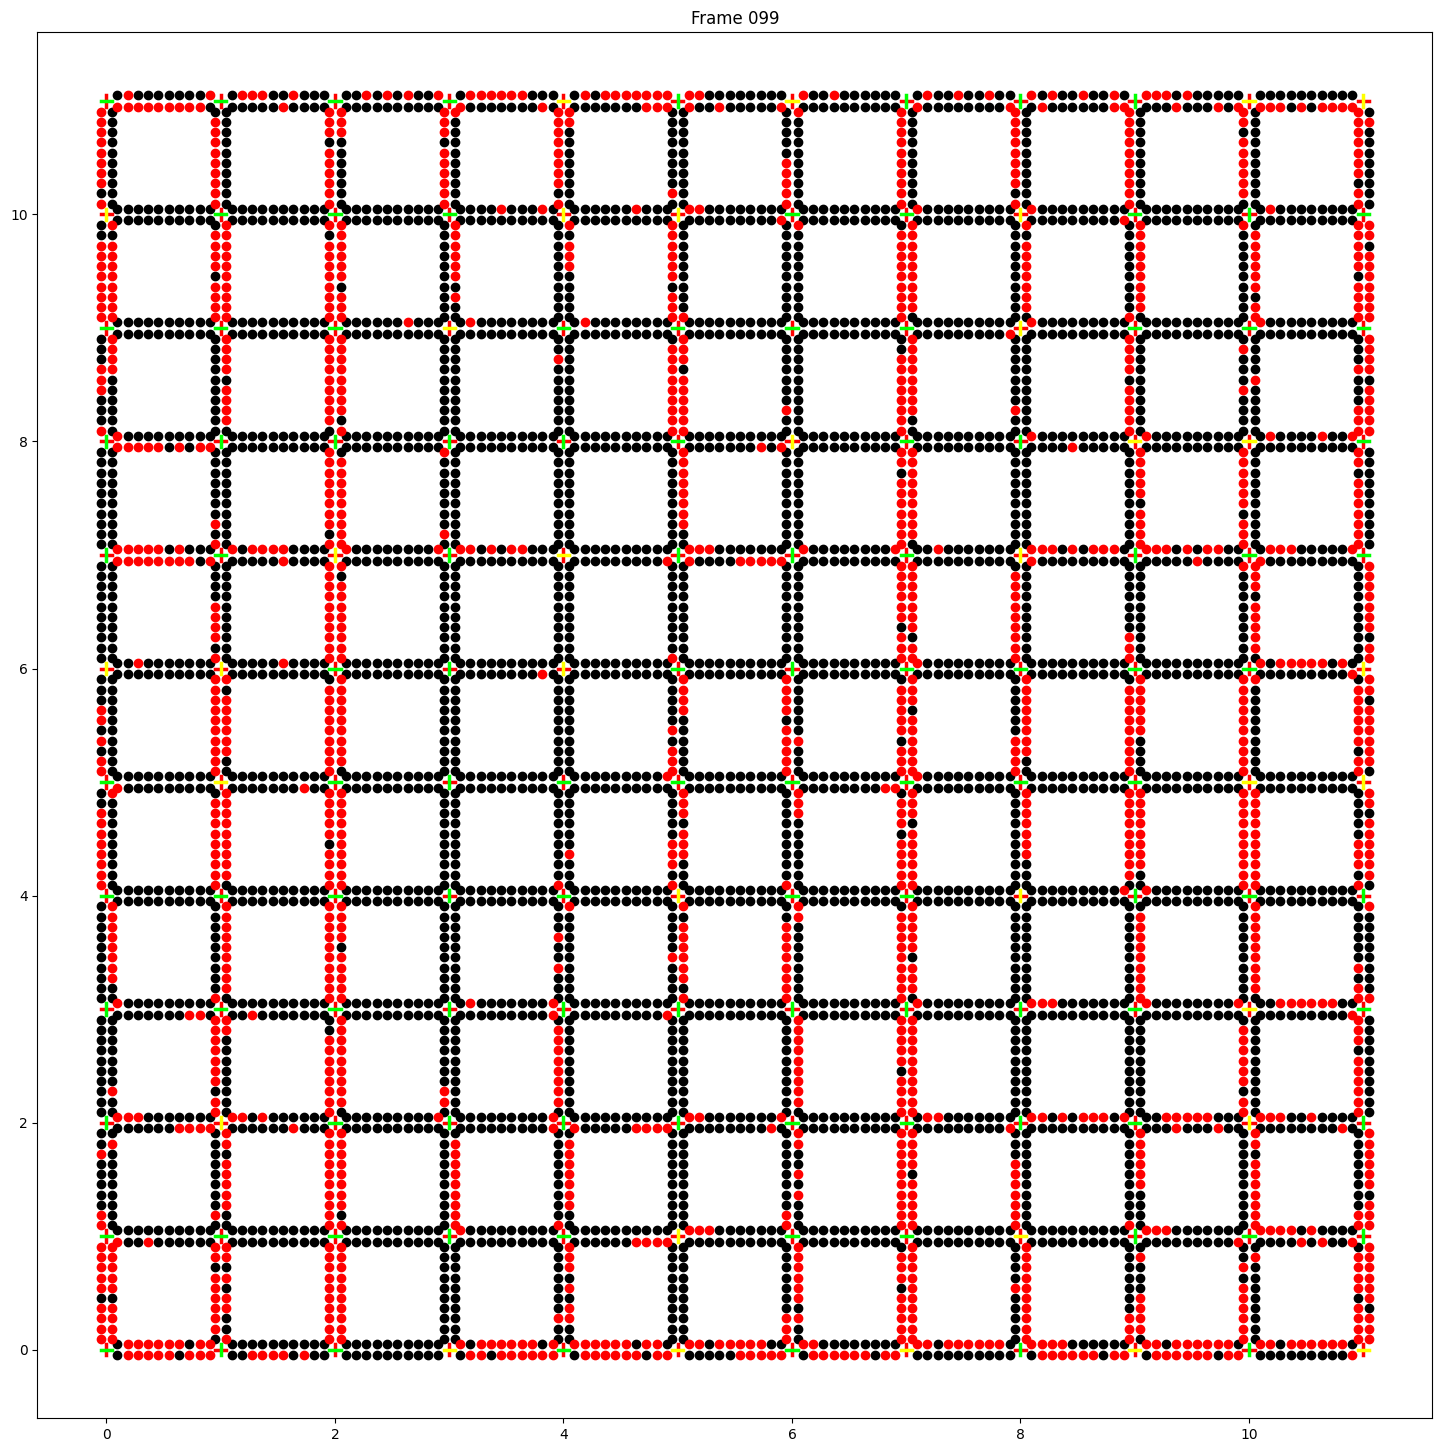

In [6]:
import matplotlib.pyplot as plt

def render_film(self, frames_count, folder="./frames"):
    fig,ax = plt.subplots(1,1, figsize=(18, 18))
    for i in range(frames_count):
        print(i)
        ax.clear()
        ax.set_title(f"Frame {str(i).zfill(3)}")
        self.grid.draw(ax)
        plt.savefig(f"{folder}/frame{str(i).zfill(3)}.png", pad_inches=0)
        self.run_simulation(1)

test_simulation.render_film = render_film
test_simulation.render_film(test_simulation, 100, "./frames")

In [ ]:
# ffmpeg -framerate 5 -i 'frame%03d.png' -c:v libx264 -pix_fmt yuv420p out.mp4

UsageError: Line magic function `%bash` not found (But cell magic `%%bash` exists, did you mean that instead?).


In [5]:
# Convert organism to text for mechanistic interpretability website
org = ecosystem.organisms[0]

string = ""
string += str(len(org.layers)) + "\n"
string += ",".join(str(l) for l in org.layers) + "\n"
for i in range(len(org.weights)):
    string += ",".join(str(x) for x in np.nditer(org.weights[i])) + ","
    string += ",".join(str(x) for x in np.nditer(org.biases[i])) + "\n"
print(string)

4
5,4,4,1
0.3665154655529764,0.26940883787890985,-3.6170572100873137,2.2592167974727113,0.7375309723139867,1.7311501429936333,1.1556809851523688,0.2699647852259367,-0.2629985531712496,-0.4539206437470659,-0.8515832100485103,-1.1671459246634823,0.46874961944242727,-1.3744188327978915,-0.18842507360336472,-0.06144223631459124,1.4102878025107457,-0.7616779420999777,-1.63694297153991,1.1578162573217081,-0.44534500298907365,0.898817056495226,-0.6382074719821649,-1.2188772513087136
-0.4366593985305829,-0.16647477745046746,1.924839377072285,-0.0977926165871548,1.5857424376010605,-0.3668600476660198,-0.8990566755740517,-0.5873416871541978,-1.893612513701998,-1.0606940868305639,-0.4677780065513302,1.3676293993103492,-0.46999596393141146,-2.582452711369717,1.8266093304655988,0.013445311346923776,0.5708864328501712,0.19680073352558863,0.6809822144678884,1.9006905942295529
-0.588682070747429,0.31455834788995524,0.9212212112415777,0.3342437819604826,0.10549227424479435

